# 課題3-2「画像処理・CVアプリケーションの自作」

---
<div style="text-align:right;">
<p style="display:inline-block; text-align:left; font-size:20px; line-height:140%;">
<!--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-->
【学生番号】17C1126 <br />
【氏　　名】明神 美都
<!--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-->
</p>
</div>

---

## 課題内容
興味のある画像処理・コンピュータビジョン技術について調査を行い,その技術に関連して地震で作成した画像処理・CVに関するアプリケーションを提出せよ.

## 本アプリケーションについて
**1. 概要** <br />
本アプリケーションは入力として与えられた画像から一時停止の旧道路標識を検出するものである。

**2. 使用技術**<br />
検出したい物体の特徴量の抽出と物体の検出を機械学習を利用して行う。

**3. アピールポイント**<br />
検出したいものが写っている画像が用意できればどのようなものも検出可能。

## 動作環境
* anaconda3-2019.10
* Python 3.7.6
* OpenCV 3.4.2（ver.4以下）

## 用意したデータ
* 検出させる物体が写っているpng画像46枚（ポジティブ画像）
* 検出させる物体が写っていないpng画像199枚（ネガティブ画像）
* 検出対象の位置と範囲が記述されたポシティブ画像一覧(.dat)
* ネガティブ画像一覧(.txt)

## 構成

  works<br />
　├ 17C1126_明神美都_課題3-3-2.ipynb<br />
    &emsp;├ test.jpg（入力画像）<br />
    &emsp;├ pos.dat<br />
    &emsp;├ neg.txt<br />
    &emsp;├ Positives<br />
    &emsp;│  &emsp;  ├ 000001.jpg<br />
    &emsp;│  &emsp;  ├ 000002.jpg<br />
    &emsp;│　&emsp;　　　 ：<br />
    &emsp;│  &emsp;  └ 000046.jpg<br />
    &emsp;├ Negatives<br />
    &emsp;│  &emsp;  ├ 000001.jpg<br />
    &emsp;│  &emsp;  ├ 000002.jpg<br />
    &emsp;│　&emsp;　　　 ：<br />
    &emsp;│  &emsp;  └ 000199.jpg<br />
    &emsp;├ stop.vec（opencv_createsamplesにより生成）<br />
    &emsp;└ cascade<br />
    &emsp;    &emsp;&emsp;  ├ cascade.xml（以下opencv_traincascadeにより生成）<br />
    &emsp;    &emsp;&emsp;       ：<br />

## 準備
1. 画像の収集
ポジティブ画像・ネガティブ画像をなるべく多く収集し、それぞれ一覧を作成しておく。ポジティブ画像には画像中の検出対象の数と位置座標についての記述が必要となるため注意。<br />
検出対象の位置座標については今回[こちら](http://wisteriahill.sakura.ne.jp/OpenCV/getArea4Haartraining/)をお借りした。

2. カスケード分類器の作成
データを用意した後に以下のコマンドを端末にて実行する。

In [ ]:
opencv_createsamples -info pos.dat -vec stop.vec -num 46
     # -info ： 読み込むポジティブ画像（一覧）を指定
     # -vec ： 生成する.vecファイルの名称を決定
     # -num ： （-infoが画像一覧の場合）ポジティブ画像の枚数

opencv_traincascade -data cascade/ -vec stop.vec -bg negative.txt -numPos 40 -numNeg 199 -featureType HAAR -mode ALL
     # -data ： 分類器を保存するフォルダの指定
     # -vec ： 読み込む.vecファイルの指定
     # -bg ： 読み込むネガティブ画像一覧の指定
     # -numPos ： ポジティブ画像の枚数
     # -numNeg ： ネガティブ画像の枚数
     # -featureType ： 扱う特徴量の指定

## 自作カスケード分類器を用いた対象(一時停止標識)の検出

In [22]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import cv2 
import numpy as np

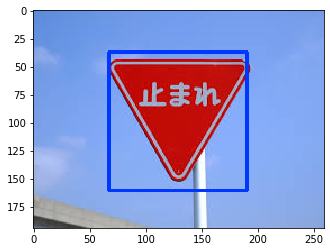

In [23]:
#標識検出を行う画像の読み込み
img = cv2.imread("test3.jpeg")

#BGR->RGB
conversion = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#グレースケール化
gray_img = cv2.cvtColor(conversion, cv2.COLOR_BGR2GRAY)

#カスケード分類器の読み込み
stop = cv2.CascadeClassifier("cascade/cascade.xml")

#一時停止標識の検出
stop_detection = stop.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=1, minSize=(10, 10))

#結果をBGR->RGB
stop_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if len(stop_detection) > 0:
    for rect in stop_detection:
        cv2.rectangle(stop_result, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (0, 55, 255), thickness=2)

#表示
plt.imshow(stop_result)


## 参考文献
[1] 「画像を読み込んで、矩形座標を取得する(haartraining用)」,<br />
&emsp;&emsp;<http://wisteriahill.sakura.ne.jp/OpenCV/getArea4Haartraining/> （参照日：2020/01/10）<br />
[2] 石郷祐介, 「OpenCVのカスケード分類器を自作して画像認識」,<br />
&emsp;&emsp;<https://www.pc-koubou.jp/magazine/21280> （参照日：2020/01/07）<br />
[3] 「OpenCVで物体検出器を作成する① ～基礎知識～」,<br />
&emsp;&emsp;<https://www.pro-s.co.jp/blog/system/opencv/6202#postList> （参照日：2020/01/15）<br />